# **Training RL Models For Virtual Home Env**

## **1. Prepare environments**
load `src` directory as project root

import neccessary modules

In [1]:
import sys
import os

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, "../.."))
sys.path.insert(0, project_root)

## **2. Training a Cross Food Gather Agent using PPO**

### **Overview**
In this notebook, we train an agent in a **CrossVirtualHomeGatherFoodEnvV2** environment to collect food and store it in the refrigerator. The training process uses the **PPO (Proximal Policy Optimization)** algorithm from Stable-Baselines3.

### **Training Process**
- We generate **four environment graphs** using `get_basic_environment_graph()`, which define different instances of the **VirtualHome** environment.
- The agent is trained using the **ModelTrainer** class, with **PPO** as the selected reinforcement learning algorithm.
- We perform **hyperparameter tuning** for `vf_coef` (value function coefficient), testing values `[0.1, 0.3, 0.5, 0.7, 0.8, 0.9]`.
- The agent is trained for **80,000 timesteps** using **4 parallel environments** (`vec_envs=4`).

### **Evaluation Metrics**
After training, we analyze:
- **Mean Reward**: Measures how well the agent is performing over time.
- **Value Loss**: Indicates how well the value function is approximating expected rewards.
- **Entropy Loss**: Reflects the agent's exploration level.

### **Code Execution**

```python
from src.training.skill_train import train_cross_food_gather_agent_v1
from pathlib import Path

# Train the agent
trainer1 = train_cross_food_gather_agent_v1()

```python
def train_cross_food_gather_agent_v1() -> ModelTrainer:

    env_graph_list = []
    for i in range(4):
        g = get_basic_environment_graph(virtualhome_exec_path=YOUR_FILE_NAME)
        env_graph_list.append(g)

    trainer = ModelTrainer(
        algo=ModelTrainerRLAlgo.PPO,
        create_env=lambda: CrossVirtualHomeGatherFoodEnvV2(env_graph_list),
    )

    hyperparameter = 'vf_coef'
    hyperparameter_list = [{hyperparameter: i} for i in [0.1, 0.3, 0.5, 0.7, 0.8, 0.9]]
    trainer.train(
        vec_envs=4,
        total_timesteps=80000,
        hyperparameters_list=hyperparameter_list
    )

    trainer.show_mean_reward(hyperparameter)
    trainer.show_value_loss(hyperparameter)
    trainer.show_entropy_loss(hyperparameter)

    return trainer

```

['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC
['D:\\programs\\windows_exec.v2.2.4\\VirtualHome.exe', '-batchmode', '-http-port=8080', '-logFile D:\\code\\llm-reinforce-learning\\docs\\train/Player_8080.log']
Getting connection...
CLOSING PROC


100%|███████████████████████████████████████████████████████████████████████████████████| 647168/647168 [10:55<00:00, 988.04it/s, mean_reward=6450.0, ep_length=9.8, learning_rate=0.0003, value_loss=9.43e+6, entropy_loss=-0.571]


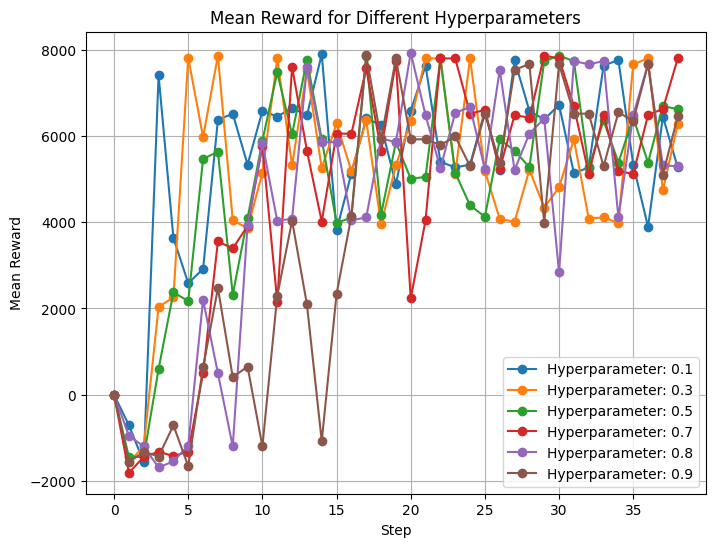

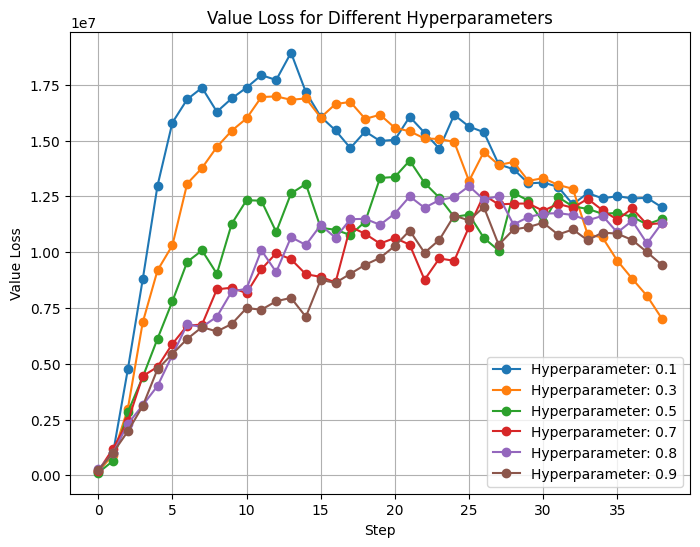

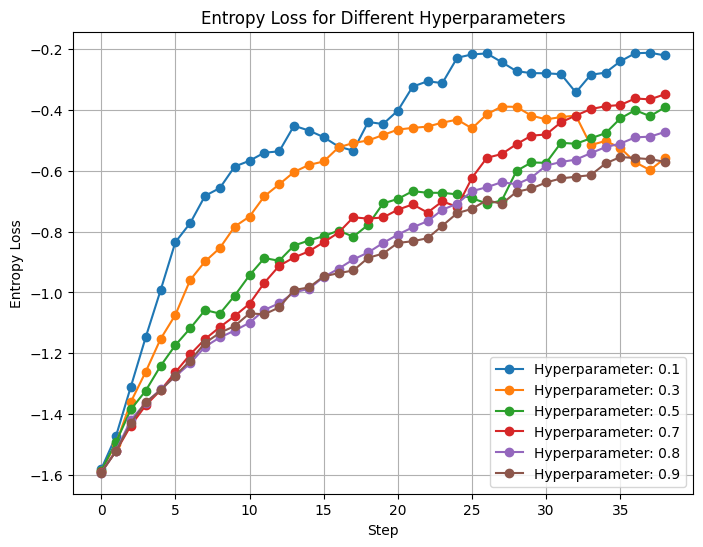

In [2]:
from src.training.skill_train import train_cross_food_gather_agent_v1
from pathlib import Path

trainer1 = train_cross_food_gather_agent_v1()

In [3]:
for i, h in enumerate([0.1, 0.3, 0.5, 0.7, 0.9]):
    trainer1.save_model(i, Path(f'../../model/cross_food_gather_agent_vfcoef{h}.zip'))